
# Breast Cancer Wisconsin (Original) Dataset Analysis

This notebook demonstrates the process of analyzing the Breast Cancer Wisconsin (Original) dataset. The workflow includes data fetching, preprocessing, model training, and evaluation. Below are the key variables used in this notebook:

- **X**: Features of the dataset.
- **y**: Target variable indicating the class (2: Benign, 4: Malignant).
- **accuracy**: Accuracy of the K-Nearest Neighbors classifier.
- **breast_cancer_wisconsin_original**: Original dataset fetched from the UCI Machine Learning Repository.
- **clf**: K-Nearest Neighbors classifier.
- **example_measures**: Example measures for prediction.
- **imputer**: Imputer for handling missing values.
- **prediction**: Predictions for the example measures.
- **x_train**: Training set features.
- **x_test**: Test set features.
- **y_train**: Training set target variable.
- **y_test**: Test set target variable.

In [285]:
# Import necessary libraries
import numpy as np   
import pandas as pd
from sklearn import preprocessing, model_selection, neighbors
from ucimlrepo import fetch_ucirepo 


## Fetching data

In [286]:
# Fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

# Metadata 
print(breast_cancer_wisconsin_original.metadata) 

# Variable information 
print(breast_cancer_wisconsin_original.variables) 




{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

## Refining dataset

In [287]:
# Replace  in 'Bare_nuclei' with -9999
X['Bare_nuclei'].fillna(-9999)
X['Bare_nuclei'].replace( '?',-9999 )

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare_nuclei, Length: 699, dtype: float64

## KNN classifier
### split datat into training data and testing data

In [288]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X_imputed, y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)


0.9785714285714285


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Predicting new patients

In [289]:
example_measures= np.array([[2,6,2,1,1,2,3,2,1],[4,2,4,1,1,2,3,2,1],[4,4,4,4,4,4,4,4,4]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2 4]


## Graph

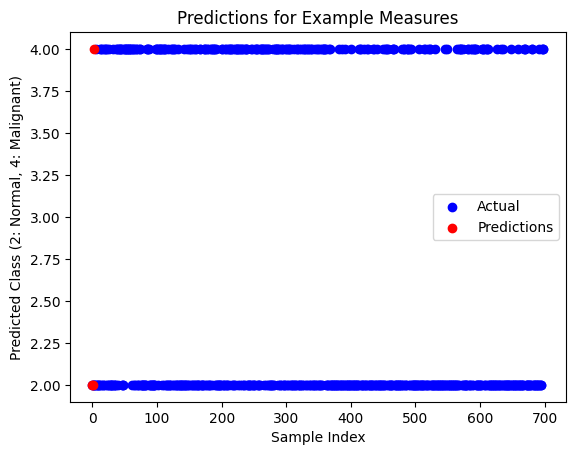

In [290]:
import matplotlib.pyplot as plt



# Plot the predictions
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.scatter(range(len(example_measures)), prediction, color='red', label='Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Class (2: Normal, 4: Malignant)')
plt.title('Predictions for Example Measures')
plt.legend()
plt.show()